<a href="https://colab.research.google.com/github/IAThangamma/Deep-Learning-Gradio-/blob/main/DL_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.8 MB/s eta 0:

In [ ]:
import gradio as gr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import datetime, os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 32
img_size = (240, 240)

# create a training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/shoes/data/train',
     shuffle=True, batch_size=batch_size, image_size=img_size,
    validation_split=0.2, subset='training', seed=42
)

# create a validation dataset
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/shoes/data/test',
    shuffle=True, batch_size=batch_size, image_size=img_size,
    validation_split=0.2, subset='validation', seed=42
)

# create a test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/shoes/data/test',
    shuffle=True, batch_size=batch_size, image_size=img_size
)

Found 711 files belonging to 3 classes.
Using 569 files for training.
Found 115 files belonging to 3 classes.
Using 23 files for validation.
Found 115 files belonging to 3 classes.


In [ ]:
# Class Names
class_names = train_dataset.class_names
class_names

['adidas', 'converse', 'nike']

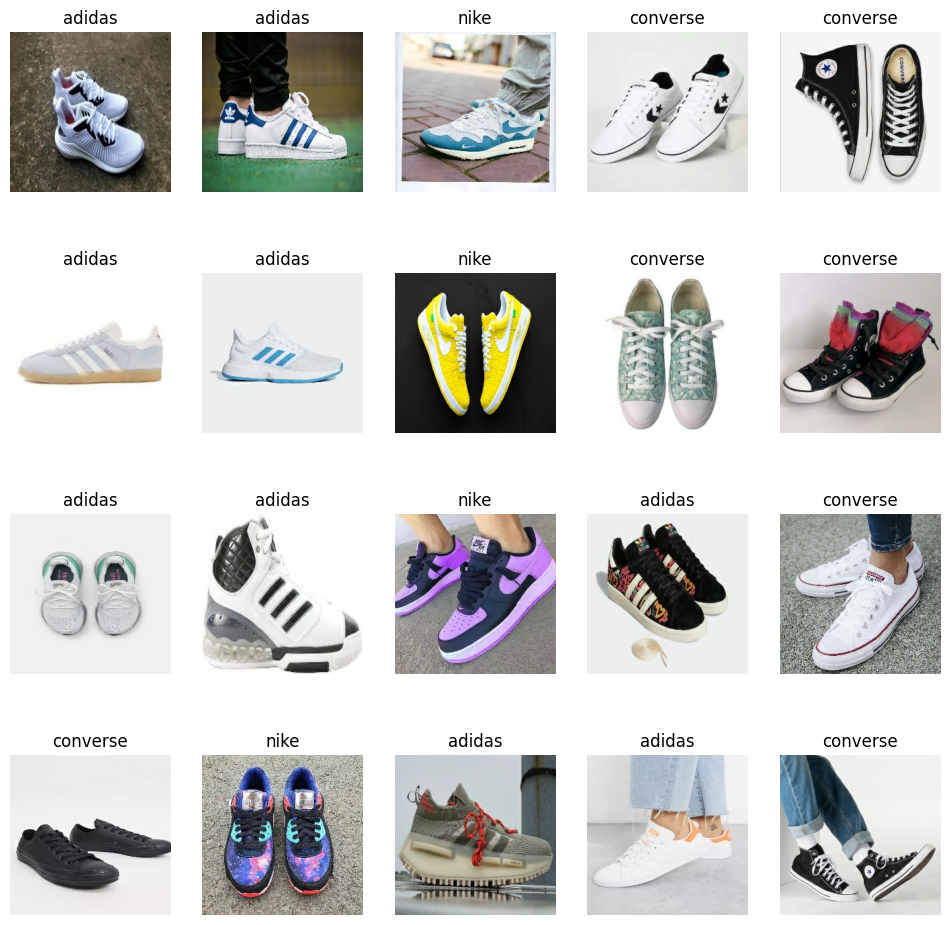

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis('off')

In [ ]:
# load a base model
base_model = keras.applications.xception.Xception(input_shape=(224, 224, 3),
                                                  weights='imagenet',
                                                  include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# create an input layer
input = keras.layers.Input(shape=(240, 240, 3))

# resize and preprocess input images
resized_input = keras.layers.Resizing(224, 224)(input)
preprocessed_input = keras.applications.xception.preprocess_input(resized_input)

# add data augmentation layers to reduce overfitting and make data more diverse
flip = keras.layers.RandomFlip('horizontal')(preprocessed_input)
rotation = keras.layers.RandomRotation(0.2)(flip)
zoom = keras.layers.RandomZoom(0.2)(rotation)

# run preprocessed images through the base model
base_model_output = base_model(zoom)

# add a GlobalAveragePooling layer and a dropout layer to reduce overfitting
avg = keras.layers.GlobalAveragePooling2D()(base_model_output)
dropout = keras.layers.Dropout(0.2)(avg)

# add a fully connected layer with 3 nodes since the dataset has 3 classes
output = keras.layers.Dense(3, activation='softmax')(dropout)

# create a model
model = keras.Model(inputs=input, outputs=output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
18/18 [==============================] - 143s 8s/step - loss: 1.1912 - accuracy: 0.2900 - val_loss: 1.0423 - val_accuracy: 0.4348
Epoch 2/10
18/18 [==============================] - 126s 7s/step - loss: 1.1308 - accuracy: 0.3533 - val_loss: 1.0182 - val_accuracy: 0.5217
Epoch 3/10
18/18 [==============================] - 121s 7s/step - loss: 1.0928 - accuracy: 0.4007 - val_loss: 0.9974 - val_accuracy: 0.5652
Epoch 4/10
18/18 [==============================] - 124s 7s/step - loss: 1.0958 - accuracy: 0.3989 - val_loss: 0.9886 - val_accuracy: 0.5217
Epoch 5/10
18/18 [==============================] - 120s 7s/step - loss: 1.0590 - accuracy: 0.4517 - val_loss: 0.9696 - val_accuracy: 0.6087
Epoch 6/10
18/18 [==============================] - 122s 7s/step - loss: 1.0382 - accuracy: 0.4341 - val_loss: 0.9501 - val_accuracy: 0.6957
Epoch 7/10
18/18 [==============================] - 120s 7s/step - loss: 1.0215 - accuracy: 0.4974 - val_loss: 0.9395 - val_accuracy: 0.6522
Epoch 8/10
18

In [ ]:
model.evaluate(test_dataset)

1/4 [======>.......................] - ETA: 51s - loss: 0.9690 - accuracy: 0.5312

Predictions:
 [1 2 1 2 0 2 1 1 0 0 1 1 1 2 2 2 1 1 0 1 0 2 2 2 1 2 2 1 0 2 1 1]
Labels:
 [1 2 0 1 0 2 1 0 0 0 1 1 0 2 0 0 1 1 0 0 2 0 2 2 0 2 2 1 0 2 2 1]


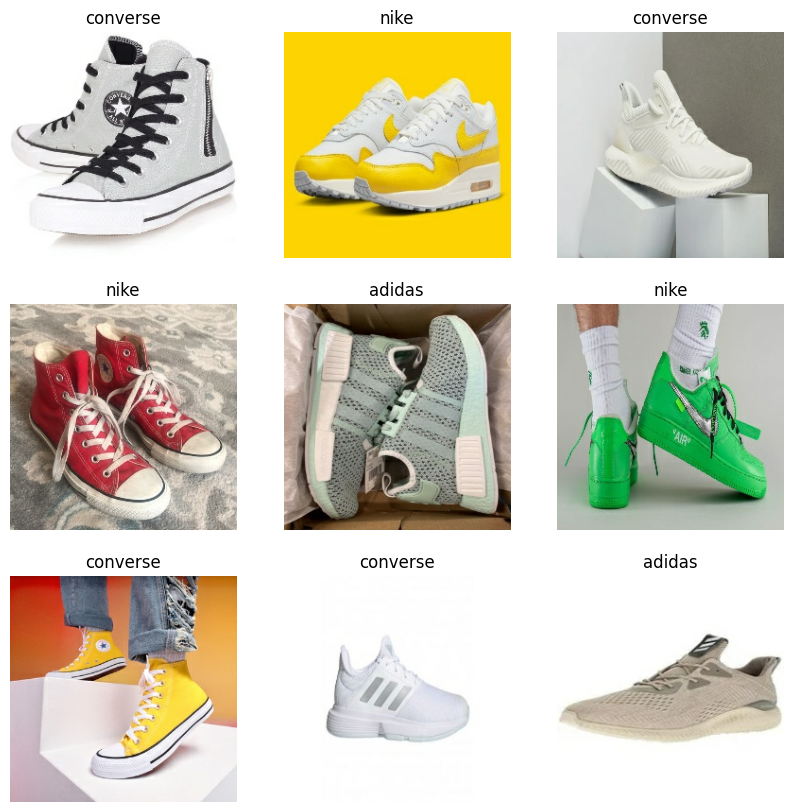

In [ ]:
# take a batch of images from the test set and make a prediction
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# apply an argmax since the model
predictions = np.argmax(predictions, axis=-1)

# print predicted and real labels
print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

# plot first 9 images with the predicted classes
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
model.save('/content/drive/MyDrive/shoes/saved_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,240,240,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
# ...

# Adjust hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 20

# Learning rate schedule callback
reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Early stopping callback
early_stop_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Train the model with callbacks
history = model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=[reduce_lr_callback, early_stop_callback]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test accuracy:", test_accuracy)

# ...

# Predict function
def predict_image(img):
    img_4d = img.reshape(-1, 240, 240, 3)
    prediction = model.predict(img_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(3)}


Epoch 1/20
18/18 [==============================] - 127s 7s/step - loss: 0.9640 - accuracy: 0.5149 - val_loss: 0.7989 - val_accuracy: 0.6522 - lr: 0.0010
Epoch 2/20
18/18 [==============================] - 125s 7s/step - loss: 0.8593 - accuracy: 0.6046 - val_loss: 0.7499 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 3/20
18/18 [==============================] - 120s 7s/step - loss: 0.8297 - accuracy: 0.6309 - val_loss: 0.7151 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 4/20
18/18 [==============================] - 121s 7s/step - loss: 0.7628 - accuracy: 0.6819 - val_loss: 0.7291 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 5/20
18/18 [==============================] - 125s 7s/step - loss: 0.7339 - accuracy: 0.6837 - val_loss: 0.7054 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 6/20
18/18 [==============================] - 123s 7s/step - loss: 0.6781 - accuracy: 0.7276 - val_loss: 0.6918 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 7/20
18/18 [==============================] - 117s 7s/step - loss: 0.6

In [ ]:
# Define the function for image prediction
def predict_image(img):
    img_4d = img.reshape(-1, 240, 240, 3)
    prediction = model.predict(img_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(3)}

# Load the pre-trained model and class names
model = keras.models.load_model('/content/drive/MyDrive/shoes/saved_model.h5')  # Update with the actual path
class_names = ['adidas', 'converse', 'nike']  # Update with your class names

In [ ]:
image = gr.inputs.Image(shape=(240,240))
label = gr.outputs.Label(num_top_classes=3)
iface = gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default')
iface.launch(debug=True,share=True)

<ipython-input-46-3eb924d923b6>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(240,240))
<ipython-input-46-3eb924d923b6>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(240,240))
<ipython-input-46-3eb924d923b6>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=3)
<ipython-input-46-3eb924d923b6>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2a6b75ea3592bca837.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 186ms/step
